In [1]:
#Importing the libraries
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rxr
import geopandas as gpd
import harmonize as hz

# Funtions to describe the datasets

In [ ]:
# Function to print the descriptive statistics of the dataset
def print_corr_statistics(matrix):
  # Print descriptive statistics of the correlation matrix
  print('Mean of the correlation matrix : ', matrix.mean().values)
  print('Standard deviation of the correlation matrix : ', matrix.std().values)
  print('Minimum of the correlation matrix : ', matrix.min().values)
  print('Maximum of the correlation matrix : ', matrix.max().values)

In [ ]:
# Definition of a function that prints the time range of the dataset with his names displayed
def print_start_end_date(ds):
    print("Start date : ", ds.time[0].values)
    print("End date: ", ds.time[-1].values)


In [ ]:
def time_resolution(ds):
    time = (ds.time[2] - ds.time[1]).values
    return time

In [ ]:
# Function to convert nanoseconds to days
def convert_nanoseconds_to_days(nanoseconds):
    return nanoseconds / 86400000000000


In [ ]:
# Function to print the descriptive statistics of the dataset
def print_dataset_statistics(ds):
    print("Descriptive statistics of the dataset")
    print('The mean of the dataset is : ', ds.mean().values)
    print('The median of the dataset is : ', ds.median().values)
    print('The standard deviation of the dataset is : ', ds.std().values)
    print('The minimum value of the dataset is : ', ds.min().values)
    print('The maximum value of the dataset is : ', ds.max().values)




# Description of the DATASETS used

## Importing datasets

In [ ]:
# Open the dataset with xarray
path_data = "../data/Raw/"
ndvi = xr.open_dataset(path_data +'Raw_NDVI_16D_1km.nc')
lai = xr.open_dataset(path_data +'Raw_LAI_8D_500m.nc')
#evap = xr.open_dataset(path_data +'Raw_evap_8D_500m.nc')
era = xr.open_dataset(path_data +'Raw_weather_4H_9km.nc')
lst_night = xr.open_dataset(path_data +'Raw_LST_Night_1D_1km.nc')
lst_day = xr.open_dataset(path_data +'Raw_LST_Day_1D_1km.nc')


## Description of the datasets

### NDVI

In [ ]:
# NDVI
print(ndvi)

In [ ]:
print_start_end_date(ndvi)

In [ ]:
# Print descriptive statistics of the dataset
print_dataset_statistics(ndvi)

In [ ]:
plt.rcParams["figure.figsize"] = [6, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,2,1)
ndvi['_1_km_16_days_NDVI'].plot()
plt.title("NDVI distribution")

plt.subplot(2,2,2)
ndvi['_1_km_16_days_EVI'].plot()
plt.title("EVI distribution")

plt.subplot(2,2,3)
ndvi['_1_km_16_days_VI_Quality'].plot()
plt.title("Quality distribution")
plt.savefig("NDVI_EVI_Quality_distrib.png")
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,2,1)
ndvi['_1_km_16_days_NDVI'][1].plot()
plt.title("NDVI")

plt.subplot(2,2,2)
ndvi['_1_km_16_days_EVI'][1].plot()
plt.title("EVI")

plt.subplot(2,2,3)
ndvi['_1_km_16_days_VI_Quality'][1].plot()
plt.title("Quality")
plt.savefig("NDVI_EVI_Quality_plot.png")
plt.show()

#### Lookups on the correlation matrix


In [ ]:
#Correlation matrix
ndvi_corr= xr.corr(ndvi['_1_km_16_days_EVI'],ndvi['_1_km_16_days_NDVI'], dim=['ydim','xdim'])


In [ ]:
print(ndvi_corr)

In [ ]:
# Print descriptive statistics of the correlation matrix
print('Mean of the correlation matrix : ', ndvi_corr.mean().values)
print('Standard deviation of the correlation matrix : ', ndvi_corr.std().values)
print('Minimum of the correlation matrix : ', ndvi_corr.min().values)
print('Maximum of the correlation matrix : ', ndvi_corr.max().values)

In [ ]:
We can see there is a strong correlation between NDVI and EVI, which is expected, and we will keep only EVI as it is an upgrade of the NDVI.

In [ ]:
We can see there is a strong correlation between NDVI and EVI, which is expected, and we will keep only EVI as it is an upgrade of the NDVI.

### LAI

In [ ]:
# LAI
print(lai)

In [ ]:
print_start_end_date(lai)

In [ ]:
# Print descriptive statistics of the dataset
print_dataset_statistics(lai)

In [ ]:
#PLot LAI variables
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,3,1)
lai['Fpar_500m'][1].plot()
plt.title("Fpar")

plt.subplot(2,3,2)
lai['Lai_500m'][1].plot()
plt.title("Lai")

plt.subplot(2,3,4)
lai['FparStdDev_500m'][1].plot()
plt.title("FparStdDev")

plt.subplot(2,3,5)
lai['LaiStdDev_500m'][1].plot()
plt.title("LaiStdDev")

plt.subplot(2,3,3)
lai['FparLai_QC'][1].plot()
plt.title("FparLai_QC")

plt.subplot(2,3,6)
lai['FparExtra_QC'][1].plot()
plt.title("FparExtra_QC")

plt.savefig("LAI_plot.png")
plt.show()

In [ ]:
#PLot distribution of the variables
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,3,1)
lai['Fpar_500m'].plot()
plt.title("Fpar")

plt.subplot(2,3,2)
lai['Lai_500m'].plot()
plt.title("Lai")

plt.subplot(2,3,4)
lai['FparStdDev_500m'].plot()
plt.title("FparStdDev")

plt.subplot(2,3,5)
lai['LaiStdDev_500m'].plot()
plt.title("LaiStdDev")

plt.subplot(2,3,3)
lai['FparLai_QC'].plot()
plt.title("FparLai_QC")

plt.subplot(2,3,6)
lai['FparExtra_QC'].plot()
plt.title("FparExtra_QC")

plt.savefig("LAI_distrib.png")
plt.show()



#### Lookups on the correlation matrix


In [ ]:
#Correlation matrix
lai_corr= xr.corr(lai['Fpar_500m'],lai['Lai_500m'], dim=['ydim','xdim'])

In [ ]:
print(lai_corr)

In [ ]:
# Print descriptive statistics of the correlation matrix
print_corr_statistics(lai_corr)

### Evapotranspiration

In [ ]:
# Evaporation
print(evap)

In [ ]:
# Print time range
print_start_end_date(evap)

In [ ]:
# Print descriptive statistics of the dataset
print_dataset_statistics(evap)

In [ ]:
#PLot  the variables
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,3,1)
evap['ET_500m'][1].plot()
plt.title("ET")

plt.subplot(2,3,2)
evap['LE_500m'][1].plot()
plt.title("LE")

plt.subplot(2,3,4)
evap['PET_500m'][1].plot()
plt.title("PET")

plt.subplot(2,3,5)
evap['PLE_500m'][1].plot()
plt.title("PLE")

plt.subplot(2,3,3)
evap['ET_QC_500m'][1].plot()
plt.title("ET_QC")


#plt.savefig("evap_plot.png")
plt.show()

In [ ]:
#PLot distribution of the variables
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,3,1)
evap['ET_500m'].plot()
plt.title("ET")

plt.subplot(2,3,2)
evap['LE_500m'].plot()
plt.title("LE")

plt.subplot(2,3,4)
evap['PET_500m'].plot()
plt.title("PET")

plt.subplot(2,3,5)
evap['PLE_500m'].plot()
plt.title("PLE")

plt.subplot(2,3,3)
evap['ET_QC_500m'].plot()
plt.title("ET_QC")


#plt.savefig("evap_distrib.png")
plt.show()

### ERA5

In [ ]:
# ERA5
print(era)

In [ ]:
# Print time range
print_start_end_date(era)

In [ ]:
# Print descriptive statistics of the dataset
print_dataset_statistics(era)

In [ ]:
#PLot distribution of the variables
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,3,1)
lai['Fpar_500m'].plot()
plt.title("Fpar")

plt.subplot(2,3,2)
lai['Lai_500m'].plot()
plt.title("Lai")

plt.subplot(2,3,4)
lai['FparStdDev_500m'].plot()
plt.title("FparStdDev")

plt.subplot(2,3,5)
lai['LaiStdDev_500m'].plot()
plt.title("LaiStdDev")

plt.subplot(2,3,3)
lai['FparLai_QC'].plot()
plt.title("FparLai_QC")

plt.subplot(2,3,6)
lai['FparExtra_QC'].plot()
plt.title("FparExtra_QC")

plt.savefig("LAI_distrib.png")
plt.show()



#### Lookups on the correlation matrix


In [ ]:
#Correlation matrix
lai_corr= xr.corr(lai['Fpar_500m'],lai['Lai_500m'], dim=['ydim','xdim'])

In [ ]:
print(lai_corr)

In [ ]:
# Print descriptive statistics of the correlation matrix
print_corr_statistics(lai_corr)

### Evapotranspiration

In [38]:
# Evaporation
print(evap)

<xarray.Dataset>
Dimensions:     (time: 77, ydim: 505, xdim: 595)
Coordinates:
  * time        (time) object 2021-01-01 00:00:00 ... 2022-08-29 00:00:00
  * ydim        (ydim) float64 5.018e+06 5.017e+06 ... 4.785e+06 4.784e+06
  * xdim        (xdim) float64 3.412e+05 3.417e+05 ... 6.16e+05 6.164e+05
Data variables:
    crs         int8 ...
    ET_500m     (time, ydim, xdim) float32 ...
    ET_QC_500m  (time, ydim, xdim) float32 ...
    LE_500m     (time, ydim, xdim) float32 ...
    PET_500m    (time, ydim, xdim) float32 ...
    PLE_500m    (time, ydim, xdim) float32 ...
Attributes:
    title:        MOD16A2.061 for aid0001
    Conventions:  CF-1.6
    institution:  Land Processes Distributed Active Archive Center (LP DAAC)
    source:       AppEEARS v3.12
    references:   See README.md
    history:      See README.md


In [ ]:
# Print time range
print_start_end_date(evap)

In [ ]:
# Print descriptive statistics of the dataset
print_dataset_statistics(evap)

In [ ]:
#PLot  the variables
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,3,1)
evap['ET_500m'][1].plot()
plt.title("ET")

plt.subplot(2,3,2)
evap['LE_500m'][1].plot()
plt.title("LE")

plt.subplot(2,3,4)
evap['PET_500m'][1].plot()
plt.title("PET")

plt.subplot(2,3,5)
evap['PLE_500m'][1].plot()
plt.title("PLE")

plt.subplot(2,3,3)
evap['ET_QC_500m'][1].plot()
plt.title("ET_QC")


#plt.savefig("evap_plot.png")
plt.show()

In [ ]:
#PLot distribution of the variables
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,3,1)
evap['ET_500m'].plot()
plt.title("ET")

plt.subplot(2,3,2)
evap['LE_500m'].plot()
plt.title("LE")

plt.subplot(2,3,4)
evap['PET_500m'].plot()
plt.title("PET")

plt.subplot(2,3,5)
evap['PLE_500m'].plot()
plt.title("PLE")

plt.subplot(2,3,3)
evap['ET_QC_500m'].plot()
plt.title("ET_QC")


#plt.savefig("evap_distrib.png")
plt.show()

### ERA5

In [10]:
# ERA5
print(era)

<xarray.Dataset>
Dimensions:    (longitude: 36, latitude: 21, time: 22975)
Coordinates:
  * longitude  (longitude) float32 4.0 4.1 4.2 4.3 4.4 ... 7.1 7.2 7.3 7.4 7.5
  * latitude   (latitude) float32 45.0 44.9 44.8 44.7 ... 43.3 43.2 43.1 43.0
  * time       (time) datetime64[ns] 2010-01-01T04:00:00 ... 2022-07-31T20:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-09-15 13:57:35 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...


In [11]:
# Print time range
print_start_end_date(era)

Start date :  2010-01-01T04:00:00.000000000
End date:  2022-07-31T20:00:00.000000000


In [12]:
# Print descriptive statistics of the dataset
print_dataset_statistics(era)

Descriptive statistics of the dataset
The mean of the dataset is :  <bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Data variables:
    u10      float32 0.2543
    v10      float32 -0.6489
    t2m      float32 284.2
    tp       float32 0.001342>
The median of the dataset is :  <bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Data variables:
    u10      float64 0.2021
    v10      float64 -0.4645
    t2m      float64 284.2
    tp       float64 9.31e-06>
The standard deviation of the dataset is :  <bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Data variables:
    u10      float64 1.644
    v10      float64 2.106
    t2m      float64 23.65
    tp       float64 0.003943>
The minimum value of the dataset is :  <bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Data variables:
    u10      float64 -17.09
    v10      float64 -15.89
    t2m      float64 244.5
    tp       float64 0.0>
The maximum value of the dataset is :  <bo

## Looking for the time range and resolution of the datasets

In [48]:
print_start_end_date(evap)

Start date :  2021-01-01 00:00:00
End date:  2022-08-29 00:00:00


In [9]:
time_resolution(ds)

numpy.timedelta64(1382400000000000,'ns')

In [11]:
convert_nanoseconds_to_days(time_resolution(ds))

numpy.timedelta64(16,'ns')

In [12]:
# Check the range of the value of the data variables
print(ds.min())

<xarray.Dataset>
Dimensions:                   ()
Data variables:
    crs                       int8 -127
    _1_km_16_days_EVI         float64 -0.2
    _1_km_16_days_NDVI        float64 -0.2
    _1_km_16_days_VI_Quality  float64 2.057e+03


In [13]:
print(ds.max())

<xarray.Dataset>
Dimensions:                   ()
Data variables:
    crs                       int8 -127
    _1_km_16_days_EVI         float64 0.8983
    _1_km_16_days_NDVI        float64 1.0
    _1_km_16_days_VI_Quality  float64 6.349e+04


Plotting the variables from LAI dataset

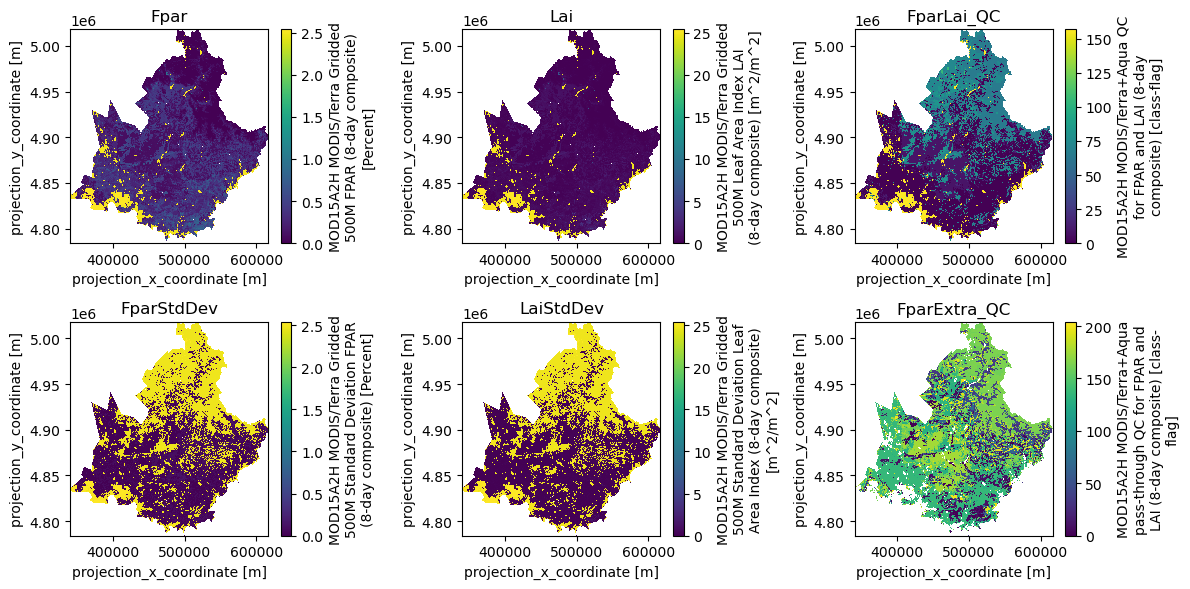

In [33]:
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,3,1)
lai['Fpar_500m'][1].plot()
plt.title("Fpar")

plt.subplot(2,3,2)
lai['Lai_500m'][1].plot()
plt.title("Lai")

plt.subplot(2,3,4)
lai['FparStdDev_500m'][1].plot()
plt.title("FparStdDev")

plt.subplot(2,3,5)
lai['LaiStdDev_500m'][1].plot()
plt.title("LaiStdDev")

plt.subplot(2,3,3)
lai['FparLai_QC'][1].plot()
plt.title("FparLai_QC")

plt.subplot(2,3,6)
lai['FparExtra_QC'][1].plot()
plt.title("FparExtra_QC")

plt.savefig("LAI_plot.png")
plt.show()

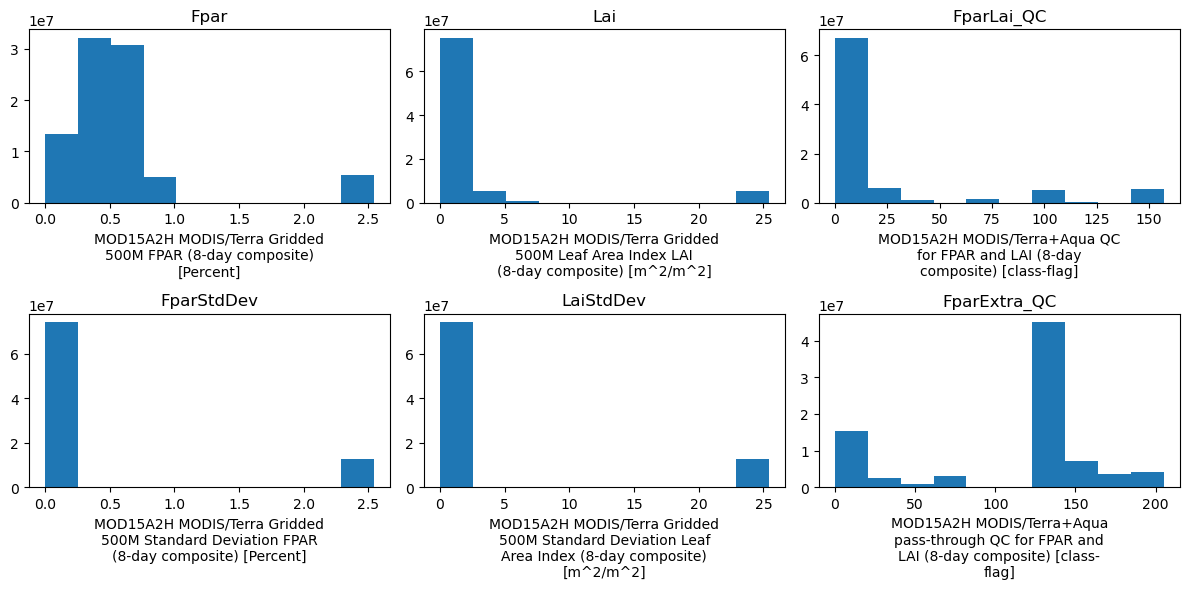

In [35]:
#PLot distribution of the variables
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,3,1)
lai['Fpar_500m'].plot()
plt.title("Fpar")

plt.subplot(2,3,2)
lai['Lai_500m'].plot()
plt.title("Lai")

plt.subplot(2,3,4)
lai['FparStdDev_500m'].plot()
plt.title("FparStdDev")

plt.subplot(2,3,5)
lai['LaiStdDev_500m'].plot()
plt.title("LaiStdDev")

plt.subplot(2,3,3)
lai['FparLai_QC'].plot()
plt.title("FparLai_QC")

plt.subplot(2,3,6)
lai['FparExtra_QC'].plot()
plt.title("FparExtra_QC")

plt.savefig("LAI_distrib.png")
plt.show()



In [ ]:
# Plot the distribution of the variables of evap
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,3,1)
evap['E'].plot()
plt.title("E")

plt.subplot(2,3,2)
evap['ES'].plot()
plt.title("ES")

plt.subplot(2,3,4)
evap['ET'].plot()
plt.title("ET")

plt.subplot(2,3,5)
evap['E_corr'].plot()


In [48]:
# Check the coordinate system of the data
print(ds.crs)

<xarray.DataArray 'crs' ()>
array(-127, dtype=int8)
Attributes:
    grid_mapping_name:                      sinusoidal
    _CoordinateAxisTypes:                   GeoX GeoY
    spatial_ref:                            PROJCS["unknown",GEOGCS["unknown"...
    radius_of_sphere:                       6371007.181
    longitude_of_central_meridian:          0
    longitude_of_projection_origin:         0
    straight_vertical_longitude_from_pole:  0
    false_easting:                          0
    false_northing:                         0


In [49]:
# Check the spatial resolution of the data
#print(ndvi["_1_km_16_days_EVI"][0].res)